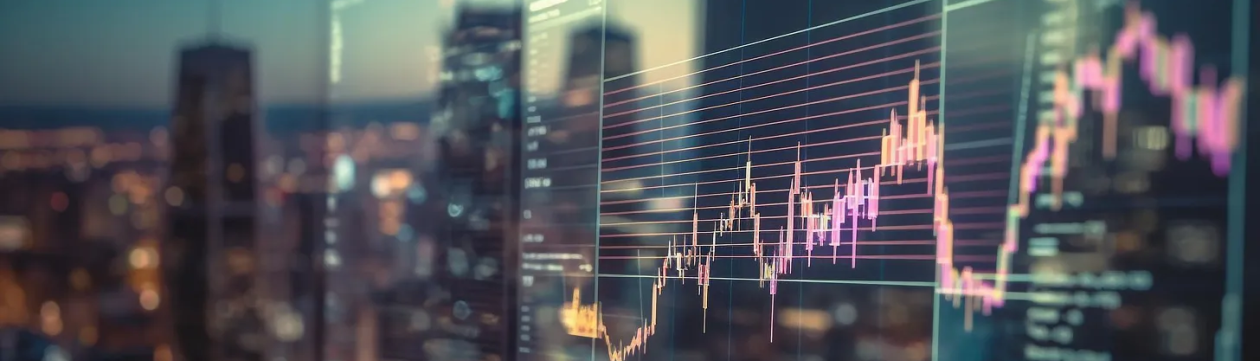

# **Analysis of the World's Most Valuable Companies**
Created by Angela Elenchevska




Welcome to my first project of this kind, where we dive into the world of publicly traded companies with the greatest market capitalization. These companies, often referred to in global business media as the world's most valuable, are benchmarks of market value and economic power.

In this notebook, I will explore and analyze a dataset containing information on these top-tier companies. The goal is to uncover trends and insights related to their market capitalization over time. Utilizing Python libraries such as pandas, seaborn, and matplotlib, I will perform various analyses and visualizations to shed light on these influential players in the global market.


## Data Import and Preview

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV file
df = pd.read_csv('market capitalization.csv')

In [ ]:
# Display first rows
print(df.head())
# Display column names
print(df.columns)
# Check for missing values
print(df.isnull().sum())
# Drop rows with missing values
df.dropna(inplace=True)

  first_quarter second_quarter third_quarter fourth_quarter  Year
0         Apple          Apple         Apple          Apple  2023
1     Microsoft      Microsoft     Microsoft      Microsoft  2023
2      Alphabet       Alphabet      Alphabet       Alphabet  2023
3        Amazon         Amazon        Amazon         Amazon  2023
4        Nvidia         Nvidia        Nvidia         Nvidia  2023
Index(['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter',
       'Year'],
      dtype='object')
first_quarter     0
second_quarter    0
third_quarter     0
fourth_quarter    0
Year              0
dtype: int64


## Analysis of Unique Companies

In [ ]:
# Extract all companies from each quarter
all_companies = pd.concat([df['first_quarter'].str.split(',').explode(),
                           df['second_quarter'].str.split(',').explode(),
                           df['third_quarter'].str.split(',').explode(),
                           df['fourth_quarter'].str.split(',').explode()])

# Get the total number of unique companies
total_unique_companies = all_companies.nunique()
print(f'Total number of unique companies: {total_unique_companies}')

Total number of unique companies: 51


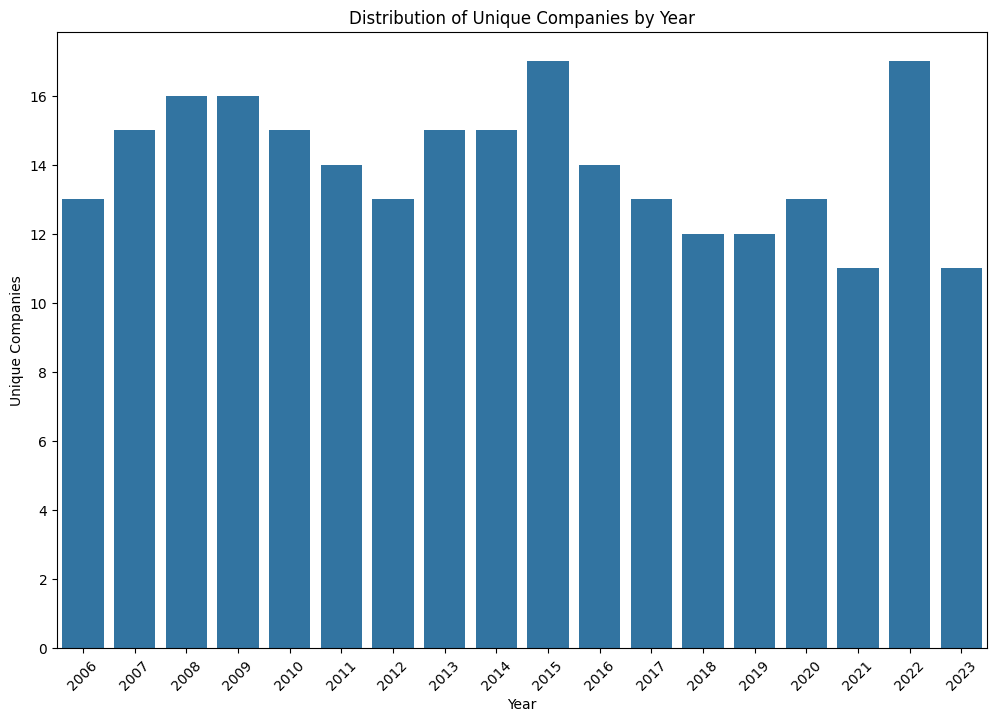

In [ ]:
# Company extraction from each year and unique companies count
unique_companies_per_year = []
years = df['Year'].unique()

for year in years:
    year_data = df[df['Year'] == year]
    companies = pd.concat([year_data['first_quarter'].str.split(',').explode(),
                           year_data['second_quarter'].str.split(',').explode(),
                           year_data['third_quarter'].str.split(',').explode(),
                           year_data['fourth_quarter'].str.split(',').explode()])
    unique_companies_per_year.append(companies.nunique())

# DataFrame for plotting
unique_companies_df = pd.DataFrame({'Year': years, 'Unique Companies': unique_companies_per_year})

# Ddistribution of unique companies by year plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Unique Companies', data=unique_companies_df)
plt.title('Distribution of Unique Companies by Year')
plt.xticks(rotation=45)
plt.show()

In this analysis of the dataset, we observed that the total number of unique companies across the years is 51. Notably, the distribution of unique companies varies significantly by year. The years 2015 and 2022 stand out with the highest number of unique companies, reflecting a peak in market activity and diversity during these periods. In contrast, 2021 and 2023 show a lower count of unique companies, indicating a period of reduced market turnover or stability. These trends highlight the dynamic nature of the market and the shifting landscape of corporate valuation over time.

## Top Companies by Frequency of Appearance

Top 10 Companies by Frequency of Appearance:
Microsoft             72
Apple                 57
ExxonMobil            49
Berkshire Hathaway    46
Alphabet              33
Amazon                33
General Electric      28
ICBC                  27
Royal Dutch Shell     24
Tencent               22
Name: count, dtype: int64


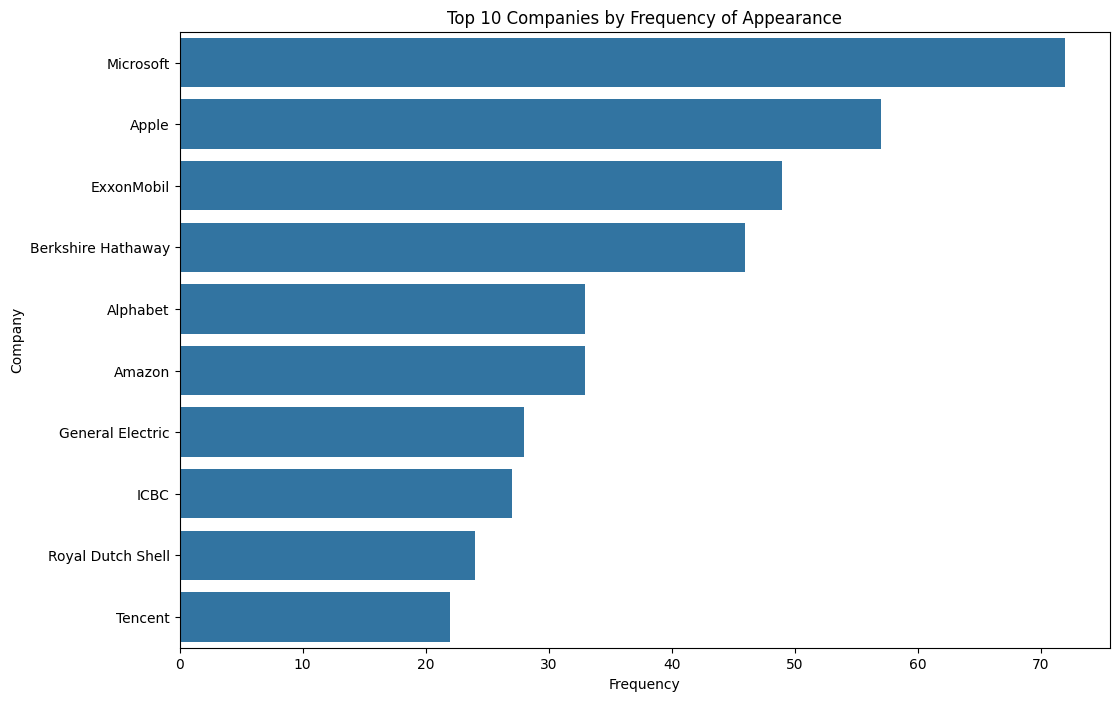

In [ ]:
# Company extraction from each quarter
all_companies = pd.concat([df['first_quarter'].str.split(',').explode(),
                           df['second_quarter'].str.split(',').explode(),
                           df['third_quarter'].str.split(',').explode(),
                           df['fourth_quarter'].str.split(',').explode()])

# Frequency count of each company across all years and quarters
company_frequency = all_companies.value_counts().head(10)
print('Top 10 Companies by Frequency of Appearance:')
print(company_frequency)

# Top 10 companies by frequency plot
plt.figure(figsize=(12, 8))
sns.barplot(x=company_frequency.values, y=company_frequency.index)
plt.title('Top 10 Companies by Frequency of Appearance')
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.show()


Our analysis of the top 10 companies by frequency reveals the dominance of certain major players in the market. Microsoft leads with the highest frequency at 72 appearances, followed by Apple with 57. ExxonMobil and Berkshire Hathaway also show significant presence, appearing 49 and 46 times respectively. Alphabet and Amazon are tied with 33 appearances each, indicating their consistent prominence. Other notable companies include General Electric (28 appearances), ICBC (27), Royal Dutch Shell (24), and Tencent (22).

## Top Companies for 2022 and 2023

In [ ]:
# Top companies for 2022 and 2023
def compare_top_companies(years):
    top_companies = {}
    for year in years:
        year_data = df[df['Year'] == year]
        companies = pd.concat([year_data['first_quarter'].str.split(',').explode(),
                               year_data['second_quarter'].str.split(',').explode(),
                               year_data['third_quarter'].str.split(',').explode(),
                               year_data['fourth_quarter'].str.split(',').explode()])
        top_10 = companies.value_counts().nlargest(10).index.tolist()
        top_companies[year] = top_10

    comparison_df = pd.DataFrame(top_companies)
    print(comparison_df)

compare_top_companies([2022, 2023])

                 2022                2023
0               Apple               Apple
1            Alphabet           Microsoft
2              Amazon            Alphabet
3           Microsoft              Amazon
4        UnitedHealth              Nvidia
5               Tesla  Berkshire Hathaway
6  Berkshire Hathaway               Tesla
7                Meta                Meta
8                Visa                TSMC
9             Tencent                Visa


Comparing the top companies for 2022 and 2023 reveals notable shifts in market leadership. In 2022, Apple, Alphabet, and Amazon were the top three, showcasing their strong market positions. However, in 2023, Apple and Alphabet maintained their leading roles, with Microsoft making a significant rise to second place. Amazon retained its position but faced increased competition from Nvidia and Berkshire Hathaway, which entered the top ranks. Other notable changes include Tesla and Meta maintaining their presence in the top 10, while Visa and Tencent experienced shifts in their rankings.

##Heatmap of Company Appearances

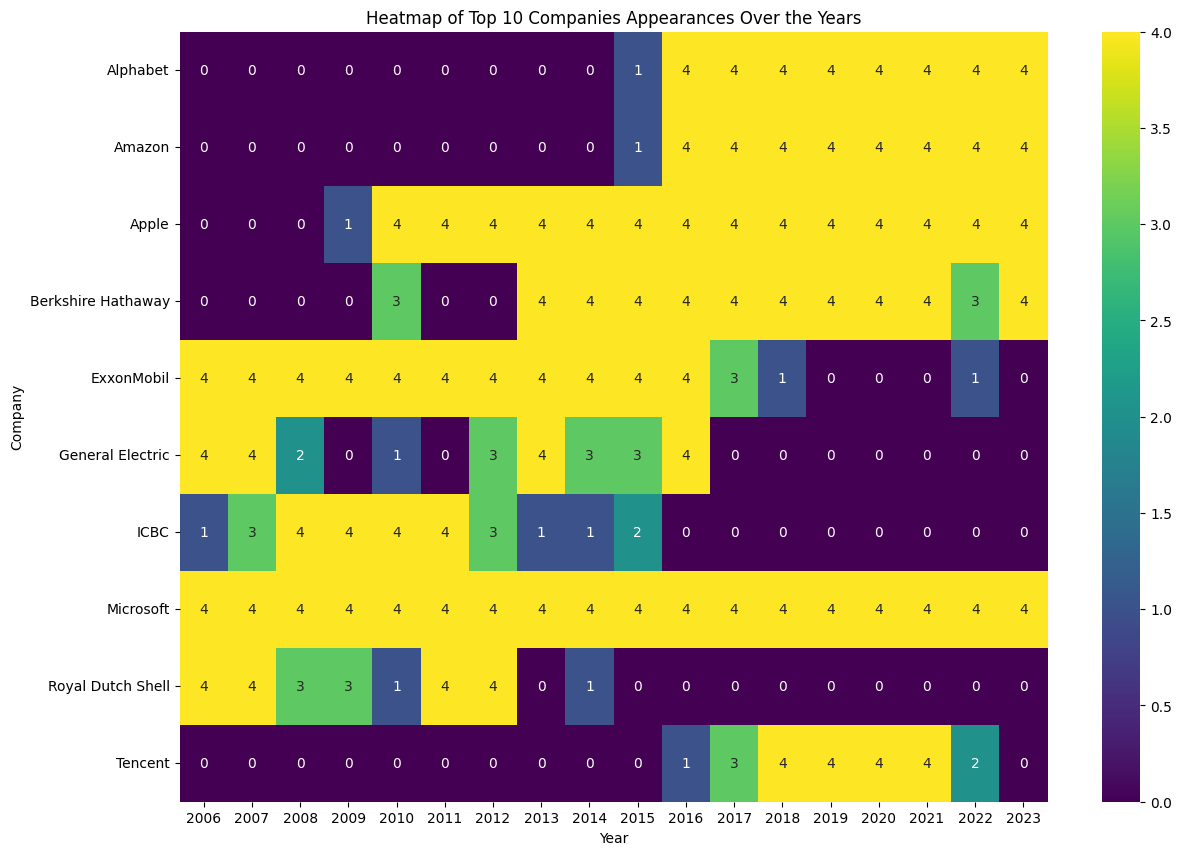

In [ ]:
# Heatmap of Company Appearances
def plot_company_heatmap(top_n=10):
    company_data = df.melt(id_vars=['Year'], value_vars=['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter'], var_name='Quarter', value_name='Company')
    company_data['Company'] = company_data['Company'].str.split(',')
    company_data = company_data.explode('Company')
    company_data['Company'] = company_data['Company'].str.strip()

    top_companies = company_data['Company'].value_counts().nlargest(top_n).index
    filtered_data = company_data[company_data['Company'].isin(top_companies)]

    heatmap_data = filtered_data.pivot_table(index='Company', columns='Year', aggfunc='size', fill_value=0)

    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Heatmap of Top {top_n} Companies Appearances Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Company')
    plt.show()

plot_company_heatmap()



The heatmap of top 10 companies from 2006 to 2023 highlights the evolving landscape of market leaders. Consistent performers like Apple, Microsoft, and Amazon dominate the later years, reflecting the tech sector's rise. Companies like ExxonMobil and General Electric show a noticeable decline, indicating shifts away from traditional industries. Emerging leaders such as Alphabet and Tencent also demonstrate significant growth, particularly from 2014 and 2017 onwards, respectively. This visualization underscores the tech industry's increasing influence and the dynamic nature of global market leadership.

## Least Performing Companies Analysis

Top 10 Least Performing Companies:
Novartis: 3
AT&amp;T: 3
Petro China: 2
Eli Lilly: 2
Pfizer: 1
Berkshire: 1
Johnson: 1
Samsung Electronics: 1
Petrochina: 1
Sinopec: 1


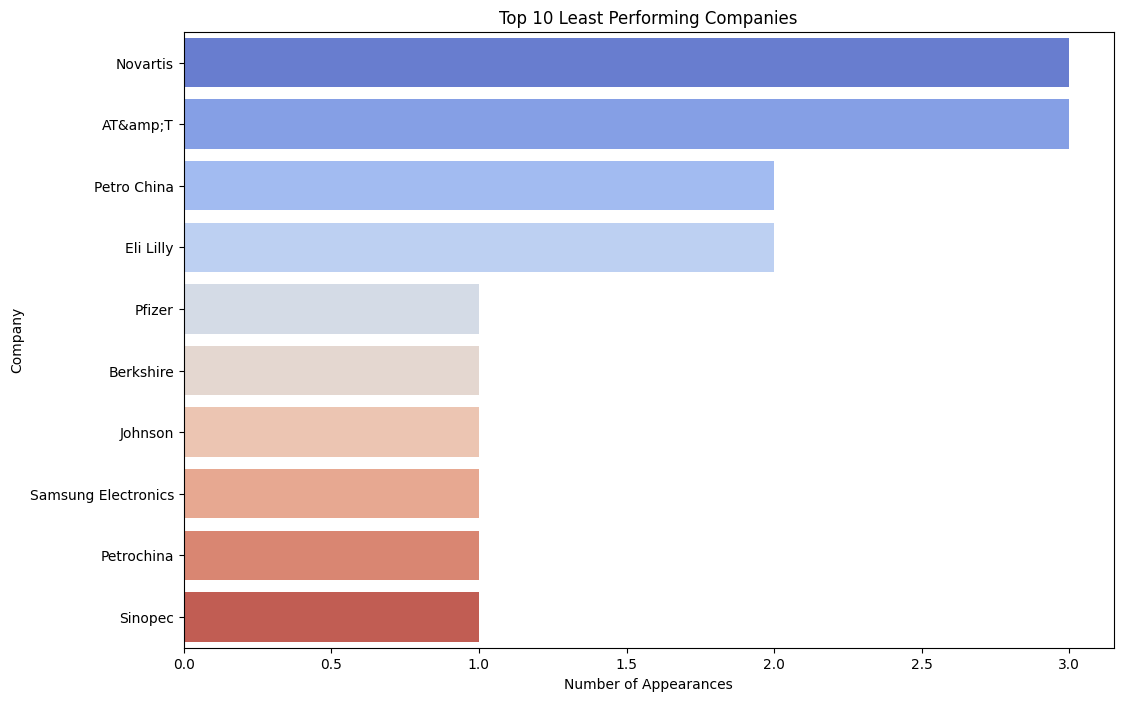

In [ ]:
# Bar chart of the top 10 least performing companies
def plot_least_performing_companies():
    company_data = df.melt(id_vars=['Year'], value_vars=['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter'], var_name='Quarter', value_name='Company')
    company_data['Company'] = company_data['Company'].str.split(',')
    company_data = company_data.explode('Company')
    company_data['Company'] = company_data['Company'].str.strip()

    least_performing_companies = company_data['Company'].value_counts().tail(10)
    print("Top 10 Least Performing Companies:")
    for company, count in least_performing_companies.items():
        print(f"{company}: {count}")

    plt.figure(figsize=(12, 8))
    sns.barplot(x=least_performing_companies.values, y=least_performing_companies.index, palette='coolwarm', hue=least_performing_companies.index, dodge=False, legend=False)
    plt.title('Top 10 Least Performing Companies')
    plt.xlabel('Number of Appearances')
    plt.ylabel('Company')
    plt.show()

plot_least_performing_companies()


This section highlights the top 10 least performing companies based on their market capitalization appearances. These companies, although significant, have shown relatively lower frequencies in the dataset. Novartis and AT&T both appear 3 times, reflecting a moderate presence in the market. Petro China and Eli Lilly each have 2 appearances, indicating their lesser prominence compared to others. The remaining companies—Pfizer, Berkshire, Johnson, Samsung Electronics, Petrochina, and Sinopec—each appear only once. Their limited appearances in this dataset may suggest shifts in market dynamics or a focus on different sectors over the analyzed periods.



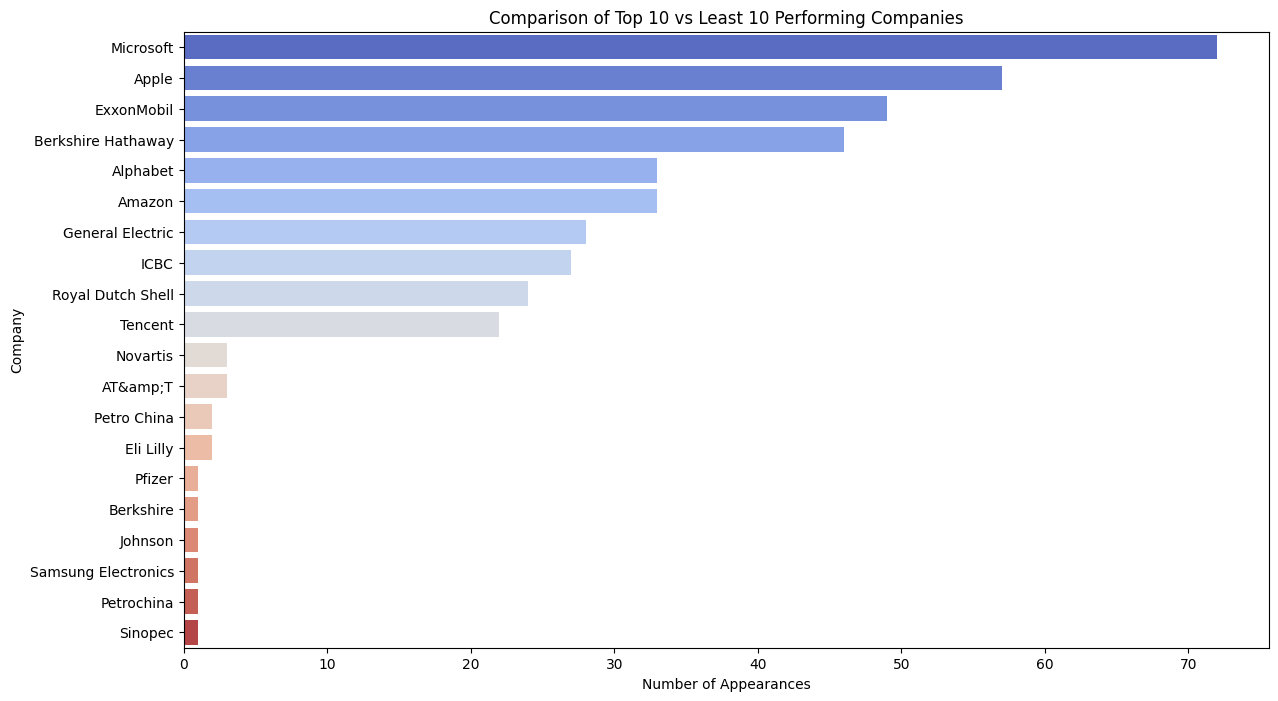

In [ ]:
# Combined bar chart of top 10 vs least 10 performing companies
def plot_top_vs_least_performing_companies():
    company_data = df.melt(id_vars=['Year'], value_vars=['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter'], var_name='Quarter', value_name='Company')
    company_data['Company'] = company_data['Company'].str.split(',')
    company_data = company_data.explode('Company')
    company_data['Company'] = company_data['Company'].str.strip()

    top_10_companies = company_data['Company'].value_counts().head(10)
    least_10_companies = company_data['Company'].value_counts().tail(10)

    comparison_data = pd.concat([top_10_companies, least_10_companies])

    plt.figure(figsize=(14, 8))
    sns.barplot(x=comparison_data.values, y=comparison_data.index, palette='coolwarm', hue=comparison_data.index, dodge=False, legend=False)
    plt.title('Comparison of Top 10 vs Least 10 Performing Companies')
    plt.xlabel('Number of Appearances')
    plt.ylabel('Company')
    plt.show()

plot_top_vs_least_performing_companies()

The bar chart presents a clear comparison between the most frequently appearing companies and the least frequently appearing ones in terms of market capitalization. Microsoft and Apple stand out at the top, each with numerous appearances, reflecting their sustained dominance and significant influence in the market over the years.

On the other hand, companies like Sinopec, Berkshire, and Pfizer are at the lower end, with significantly fewer appearances. This suggests they either had less market stability or faced challenges that prevented them from maintaining a consistent top position.These companies might have experienced market fluctuations, competitive pressures, or industry-specific hurdles that affected their standings.

In [ ]:
def most_drops_top_10(df):
    # List of companies in the top 10 for each year
    top_10_by_year = {}
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        melted = year_data.melt(id_vars=['Year'], value_vars=['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter'], var_name='Quarter', value_name='Company')
        top_10_by_year[year] = melted['Company'].value_counts().index.tolist()[:10]

    # Number of drops for each company
    drop_counts = {}
    for year in range(df['Year'].min(), df['Year'].max()):
        current_year_companies = top_10_by_year.get(year, [])
        next_year_companies = top_10_by_year.get(year + 1, [])

        for company in current_year_companies:
            if company not in next_year_companies:
                if company not in drop_counts:
                    drop_counts[company] = 0
                drop_counts[company] += 1

    drops = pd.Series(drop_counts).sort_values(ascending=False).head(5).reset_index().rename(columns={'index': 'Company', 0: 'Number of Drops'})
    return drops

# Table generation
most_drops_top_10_table = most_drops_top_10(df)
print(most_drops_top_10_table)



               Company  Number of Drops
0              Walmart                3
1    Royal Dutch Shell                2
2            Petrobras                2
3  Chevron Corporation                2
4         China Mobile                2


The table above highlights the companies that experienced the most drops from the top 10 list of the highest market capitalizations over the analyzed period.

Walmart experienced the most significant instability, dropping out of the top 10 on three separate occasions. This volatility may be attributed to increasing competition from e-commerce giants and changing consumer behaviors impacting traditional retail operations.

Royal Dutch Shell, Petrobras, and Chevron Corporation likely faced fluctuations due to volatile oil prices, geopolitical factors, and a global shift towards renewable energy sources. China Mobile's drops may be related to the rapidly evolving technology and telecom sectors, facing competition and regulatory challenges.

## Apple Market Capitalization Preview

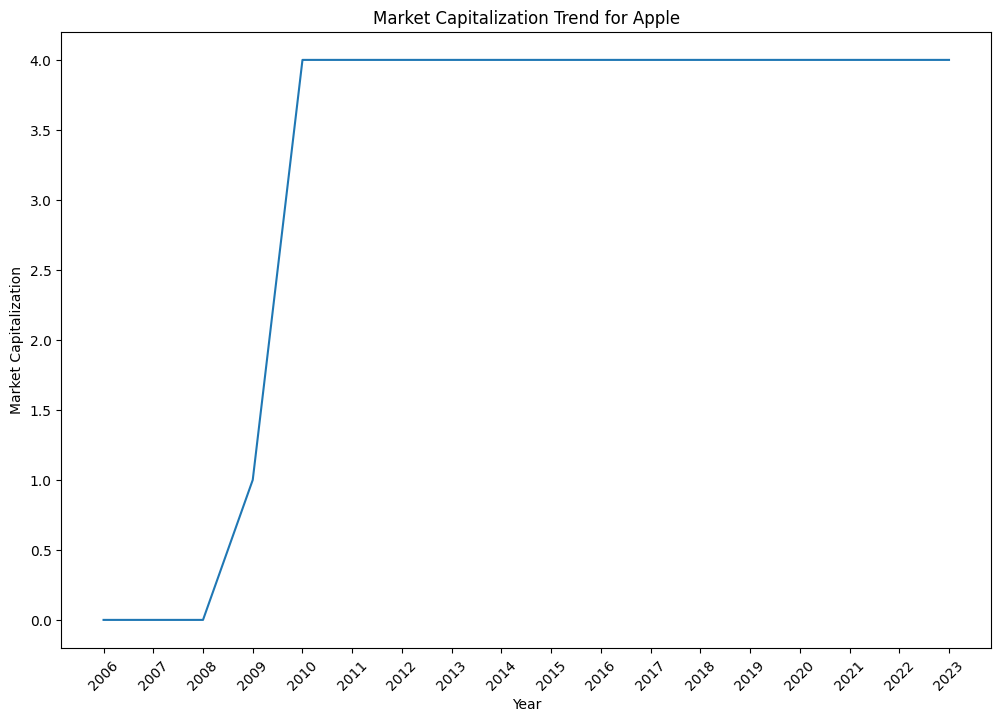

In [ ]:
# Plot market capitalization trend for Apple
def plot_company_trend(company_name):
    company_data = []
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        total_market_cap = 0
        for quarter in ['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter']:
            if year_data[quarter].str.contains(company_name, na=False).any():
                total_market_cap += 1
        company_data.append((year, total_market_cap))

    company_df = pd.DataFrame(company_data, columns=['Year', 'Market Capitalization'])

    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Year', y='Market Capitalization', data=company_df)
    plt.title(f'Market Capitalization Trend for {company_name}')
    plt.xticks(ticks=df['Year'].unique(), rotation=45)
    plt.show()

plot_company_trend('Apple')


The market capitalization trend for Apple indicates significant growth beginning in 2009, with a notable peak by 2011.This surge can be attributed to the success of innovative products such as the iPhone and iPad, which revolutionized the tech industry. Since then, Apple has maintained a strong presence through 2023, highlighting its sustained market dominance and consistent performance. This trend underscores Apple's role as a leading company in the global market over the years.

# **Summary**

This analysis of publicly traded companies with the greatest market capitalization has revealed key insights into market dynamics. We observed that tech giants like Microsoft, Apple, and Amazon consistently lead the market, while traditional industries face declines. The year-by-year distribution and frequency of top performers highlight shifts in market leadership and sector prominence.

The comparison between 2022 and 2023 underscores the evolving landscape, with tech companies solidifying their positions and new contenders emerging. Additionally, examining the least performing companies provides context on market volatility and sector-specific challenges.

Overall, this project illustrates the importance of monitoring market trends to understand changes in corporate valuation. Thank you for joining me in this exploration of the worlds most valuable companies.